In [5]:
# Input: M scipy.sparse.csc_matrix
# Output: NetworkX Graph
def nx_graph_from_biadjacency_matrix(M):
    # Give names to the nodes in the two node sets
    U = [ "u{}".format(i) for i in range(M.shape[0]) ]
    V = [ "v{}".format(i) for i in range(M.shape[1]) ]

    # Create the graph and add each set of nodes
    G = nx.Graph()
    G.add_nodes_from(U, bipartite=0)
    G.add_nodes_from(V, bipartite=1)

    # Find the non-zero indices in the biadjacency matrix to connect 
    # those nodes
    G.add_edges_from([ (U[i], V[j]) for i, j in zip(*M.nonzero()) ])

    return G

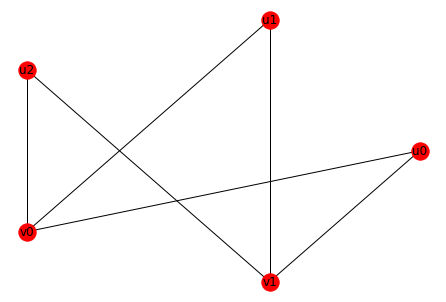

In [10]:
import networkx as nx, numpy as np
from networkx.algorithms import bipartite
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
RB = nx.complete_bipartite_graph(3, 2)
A  = csc_matrix(bipartite.biadjacency_matrix(RB, row_order=bipartite.sets(RB)[0]))
G = nx_graph_from_biadjacency_matrix(A)
print(G)
nx.draw_circular(G, node_color = "red", with_labels = True)
plt.show()